In [1]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.ticker as mtick
import pandas as pd

In [2]:
def make_plot(savefilename, N, metrics, labels, errors, title, xlabel, yrange=(0,1), perc = False, savefigure = False ):
    N = np.array(N)
    metrics = np.array(metrics)
    labels = np.array(labels)
    errors = np.array(errors)
    # These are the "Tableau 20" colors as RGB.    
    tableau20 = [(31, 119, 180), 
                 #(174, 199, 232), 
                 (255, 127, 14), 
                 #(255, 187, 120),    
                 (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
                 (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
                 (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
                 (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    

    # Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
    for i in range(len(tableau20)):    
        r, g, b = tableau20[i]    
        tableau20[i] = (r / 255., g / 255., b / 255.)                 

    fig = plt.figure(figsize=(10,7.5))
    ax = plt.subplot(111)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False) 
    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()
    ax.grid(color='grey', linestyle='--', linewidth=1, axis="both",alpha=0.5)
    #ax.set_xticks(N)

    for rank, column in enumerate(metrics):    
        # Plot each line separately with its own color, using the Tableau 20    
        # color set in order.    
        plt.plot(N,column,lw=2.5, color=tableau20[rank])  
        
        #print(errors[rank])
        #print(type(errors[rank]))
        
        plt.fill_between(N, column-errors[rank], column+errors[rank], alpha=0.2)

        y_pos = column[-1] 
        plt.text(N[-1]+(N[-1]/50), y_pos, labels[rank], fontsize=14, color=tableau20[rank])

    #ax.plot(N, f1 , '-b', label='F1')
    #ax.plot(N, prec, '-r', label='Precision')
    #ax.plot(N, rec, '-g', label='Recall')
    #ax.plot(N, val_loss, '-b', label='Validation')
    #ax.plot(N, train_loss, '-r', label='Training')

    plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                    labelbottom=True, left=True, right=False, labelleft=True)    

    plt.xlabel(xlabel,fontsize=12)
    plt.title(title,fontsize=14,ha="center",position=(0.5,1.03))
    
    if perc:
        fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
        xticks = mtick.FormatStrFormatter(fmt)
        ax.xaxis.set_major_formatter(xticks)

    #plt.ylim((0,0.5))
    plt.ylim(yrange)

    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width*0.8, box.height])
    #ax.legend(loc='center left', bbox_to_anchor=(1,0.5))
    if savefigure:
        plt.savefig("figures/"+savefilename+".png",bbox_inches="tight")
    plt.show()
    plt.close()

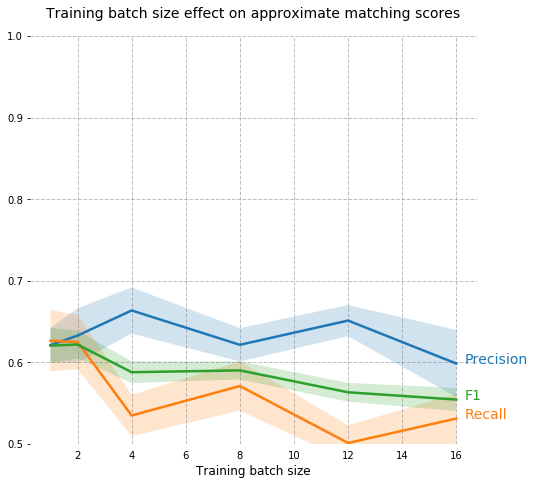

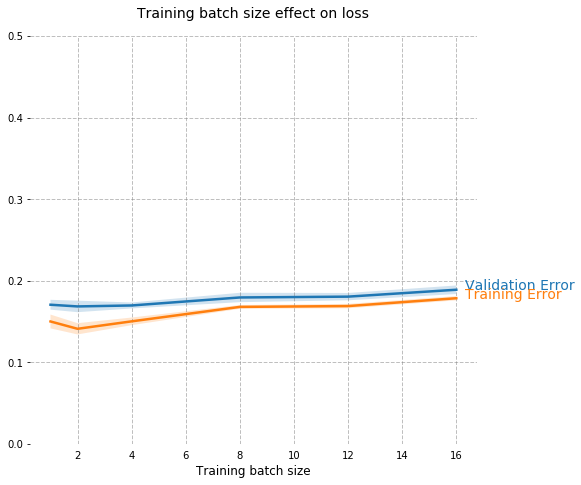

In [13]:

#filelist=""
#files = filelist.split(",")
files=[]

#for n in [10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]:
    #files.append("adr_" + str(n))

for n in [1,2,4,8,12,16]:
    files.append("reddit_" + str(n))
    
#for n in [0,1,2,3,4,5,6,7,8,9]:
    #files.append("testdropout0" + str(n))


#for n in [50,100,150,200,250]:
    #files.append("red_" + str(n))

#files.append("lcren_full")

#print(files)

subfolder = "batch_size_test"

rec = []
prec = []
f1 = []
N = []
val_loss=[]
train_loss=[]
val_acc=[]
train_acc=[]

rec_err = []
prec_err = []
f1_err = []
val_loss_err=[]
train_loss_err=[]
val_acc_err=[]
train_acc_err=[]

for f in files:
    filename = "logs/kfold/" + subfolder + "/" + f.strip() + ".txt"
    rec_a = []
    prec_a = []
    f1_a = []
    N_ = []
    val_loss_=[]
    train_loss_=[]
    val_acc_=[]
    train_acc_=[]
    
    
    
    with open(filename) as instream:
        header = instream.readline()
        headers = header.replace("\n","").split("|")
        for i in range(len(headers)):
            if headers[i] == "n":
                n_i = i
            if headers[i] == "f1_a":
                f_i = i
            if headers[i] == "rec_a":
                r_i = i
            if headers[i] == "prec_a":
                p_i = i
            if headers[i] == "val_loss":
                vl_i = i
            if headers[i] == "train_loss":
                tl_i = i
            if headers[i] == "val_acc":
                va_i = i
            if headers[i] == "train_acc":
                ta_i = i
            
        for line in instream:
            row = line.replace("\n","").split("|")
            rec_a.append(float(row[r_i].strip()))
            prec_a.append(float(row[p_i].strip()))
            f1_a.append(float(row[f_i].strip()))
            N_.append(int(row[n_i].strip()))
            val_loss_.append(float(row[vl_i].strip()))
            train_loss_.append(float(row[tl_i].strip()))
            val_acc_.append(float(row[va_i].strip()))
            train_acc_.append(float(row[ta_i].strip()))
            
    rec.append(np.mean(rec_a))
    prec.append(np.mean(prec_a))
    f1.append(np.mean(f1_a))
    N.append(np.max(N_))
    val_loss.append(np.mean(val_loss_))
    train_loss.append(np.mean(train_loss_))
    val_acc.append(np.mean(val_acc_))
    train_acc.append(np.mean(train_acc_))
    
    rec_err.append(np.std(rec_a)/np.sqrt(len(rec_a)))    
    prec_err.append(np.std(prec_a)/np.sqrt(len(prec_a)))
    f1_err.append(np.std(f1_a)/np.sqrt(len(f1_a)))
    val_loss_err.append(np.std(val_loss_)/np.sqrt(len(val_loss_)))
    train_loss_err.append(np.std(train_loss_)/np.sqrt(len(train_loss_)))
    val_acc_err.append(np.std(val_acc_)/np.sqrt(len(val_acc_)))
    train_acc_err.append(np.std(train_acc_)/np.sqrt(len(train_acc_)))
    
    
    

savefigure = True
perc = False

#N=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
N=[1,2,4,8,12,16]
#N=[10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
xlabel = 'Training batch size'

metrics = [prec,rec,f1]
errors = [prec_err,rec_err,f1_err]
labels = ["Precision", "Recall","F1"]
title = 'Training batch size effect on approximate matching scores'

yrange=(0.5,1)
savefilename = "f1_batch_size_reddit"
make_plot(savefilename, N,metrics,labels,errors, title, xlabel,yrange,perc,  savefigure)

metrics = [val_loss,train_loss]
errors = [val_loss_err,train_loss_err]
labels = ["Validation Error", "Training Error"]
title = 'Training batch size effect on loss'
yrange=(0,0.5)
savefilename = "loss_batch_size_reddit"
make_plot(savefilename, N,metrics,labels, errors, title, xlabel,yrange,perc, savefigure)


#props = [50,60,70,80,90,100]


In [16]:
def makepie(values, labels, title="No Title", fignum=0):
    tableau20 = [(174, 199, 232),                
                (152, 223, 138),                
                (255, 187, 120),
                 (255, 152, 150)    ]
    
    # Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
    for i in range(len(tableau20)):   
        r, g, b = tableau20[i]    
        tableau20[i] = (r / 255., g / 255., b / 255.)  

    fig = plt.figure(figsize=(20,7.5))
    ax = plt.subplot(111)
    ax.axis('equal')  
    patches, texts, autotexts = plt.pie(values, labels=None, autopct='%1.1f%%', shadow=False, colors=tableau20)
    for text in texts:
        text.set_color('black')
        text.set_size(16)
    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_size(16)
    ax.set_title(title, size=16)
    plt.legend(patches, labels, loc="lower left", fontsize=16)
        
    #draw circle
    #centre_circle = plt.Circle((0,0),0.60,fc='white')
    #fig = plt.gcf()
    #fig.gca().add_artist(centre_circle)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width*0.8, box.height])
    
    
    plt.savefig("figures/"+title+str(fignum)+".png",bbox_inches="tight")
    plt.show()

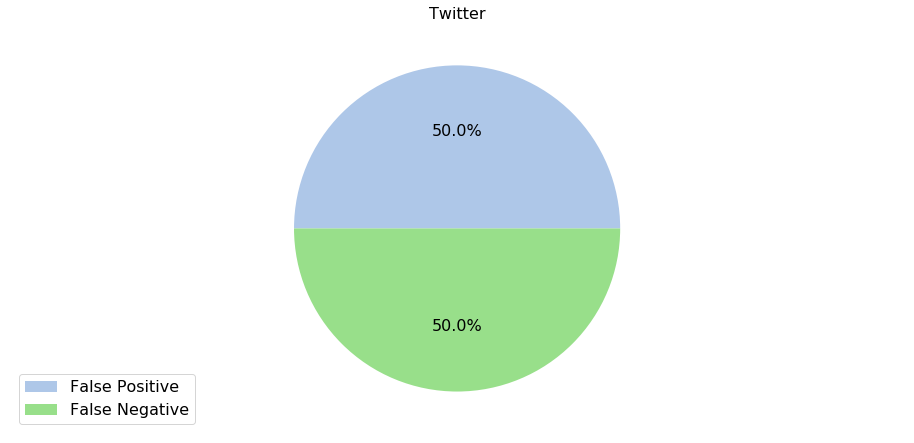

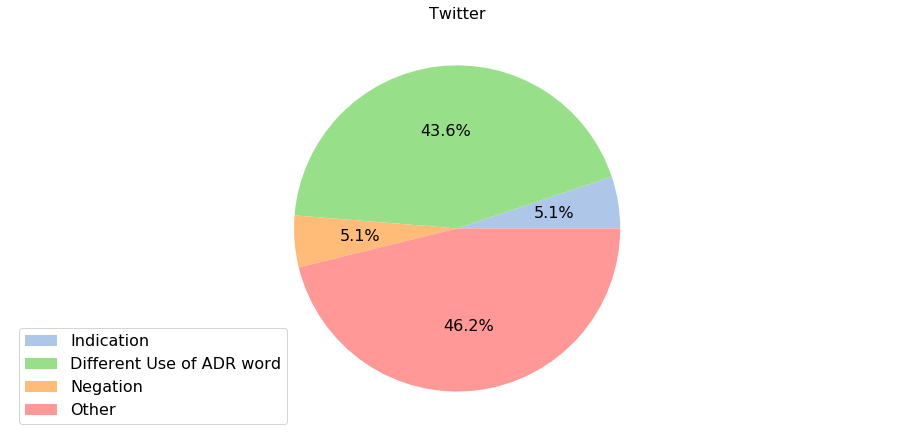

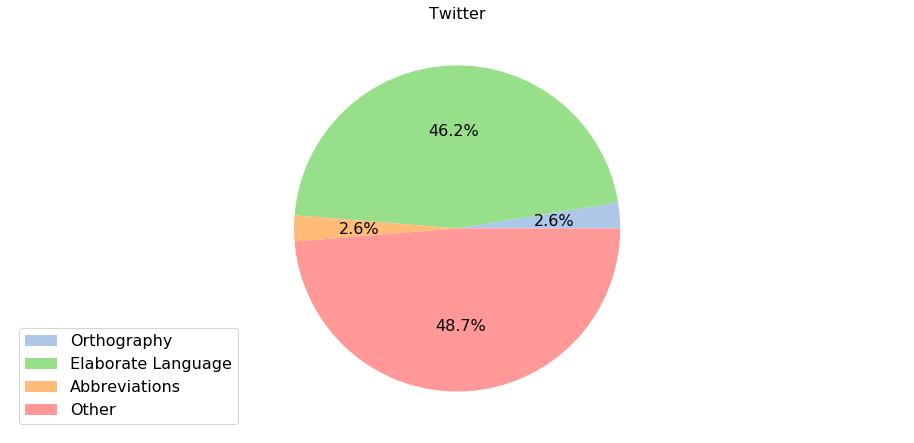

In [17]:
 #Twitter
labels= ["False Positive", "False Negative"]
values = [39,39]

makepie(values, labels, "Twitter",1)

labels = ["Indication","Different Use of ADR word", "Negation", "Other"]
values = [2,17,2,18]

makepie(values, labels, "Twitter",2)


labels = ["Orthography", "Elaborate Language", "Abbreviations","Other"]
values = [1,18,1,19]

makepie(values, labels, "Twitter",3)

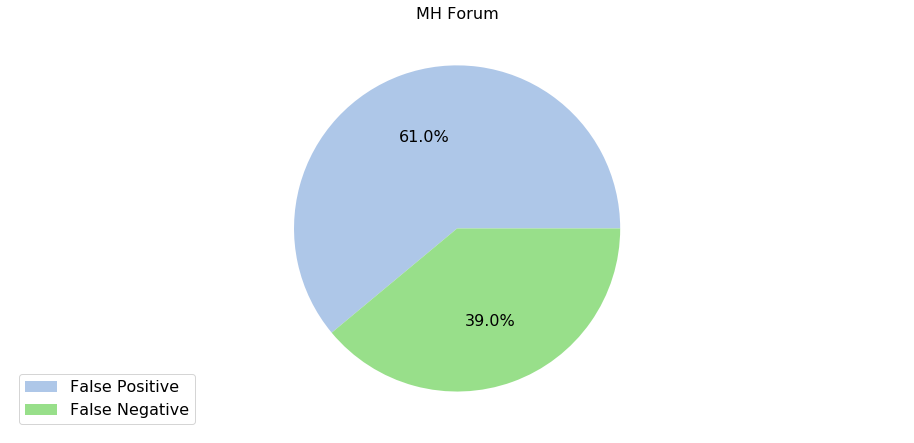

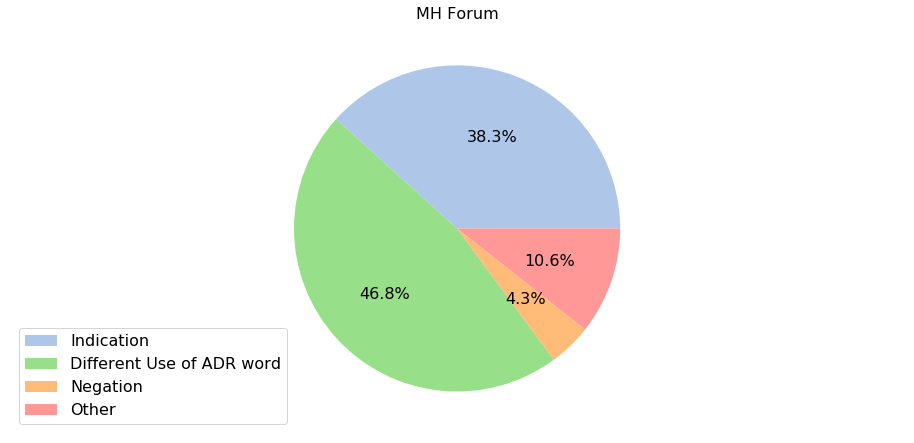

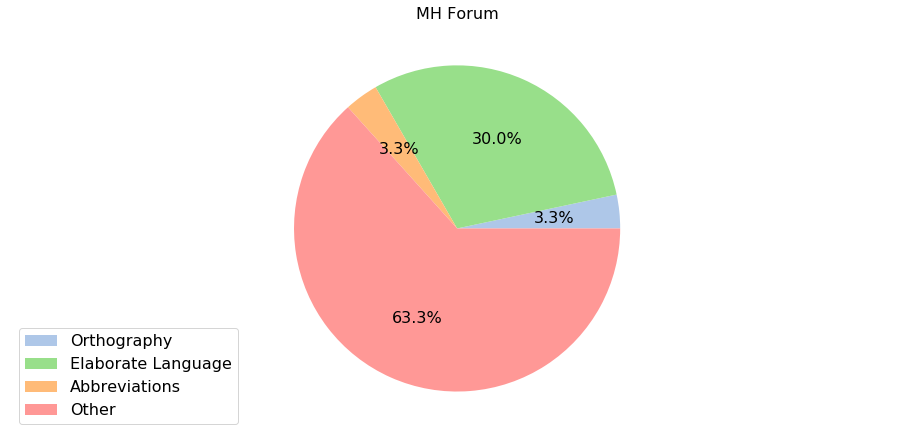

In [18]:
#MHF
labels= ["False Positive", "False Negative"]
values = [47,30]
makepie(values, labels,"MH Forum",1)

labels = ["Indication","Different Use of ADR word", "Negation", "Other"]
values = [18,22,2,5]
makepie(values, labels,"MH Forum",2)

labels = ["Orthography", "Elaborate Language", "Abbreviations","Other"]
values = [1,9,1,19]
makepie(values, labels,"MH Forum",3)

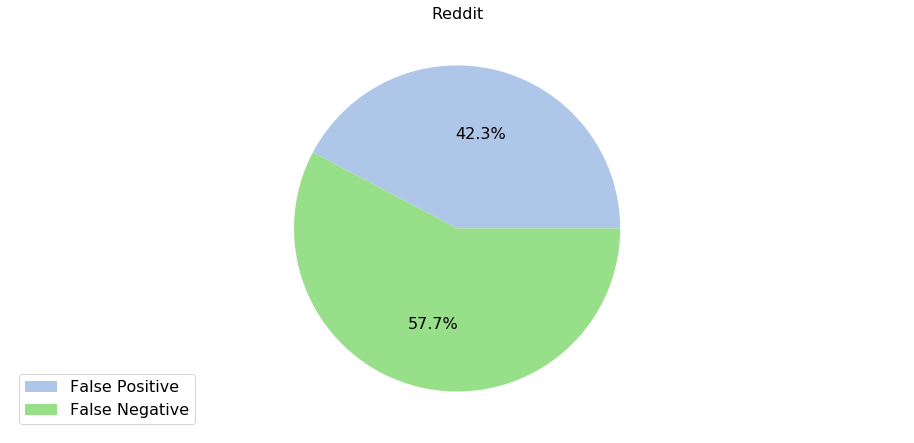

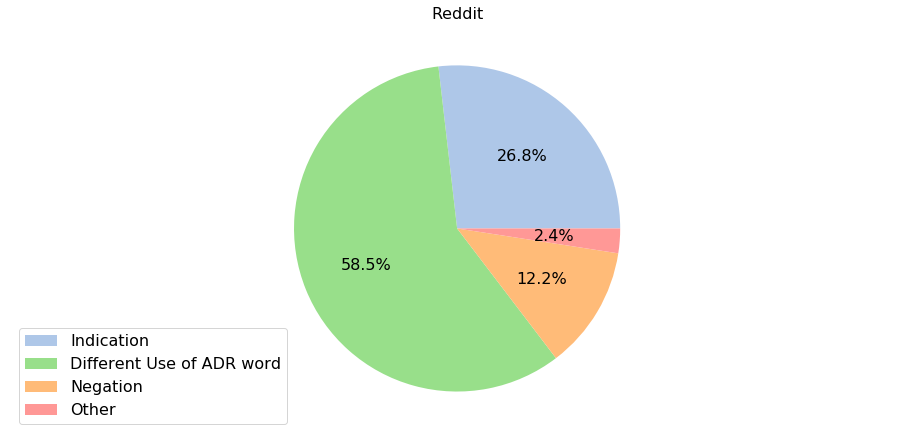

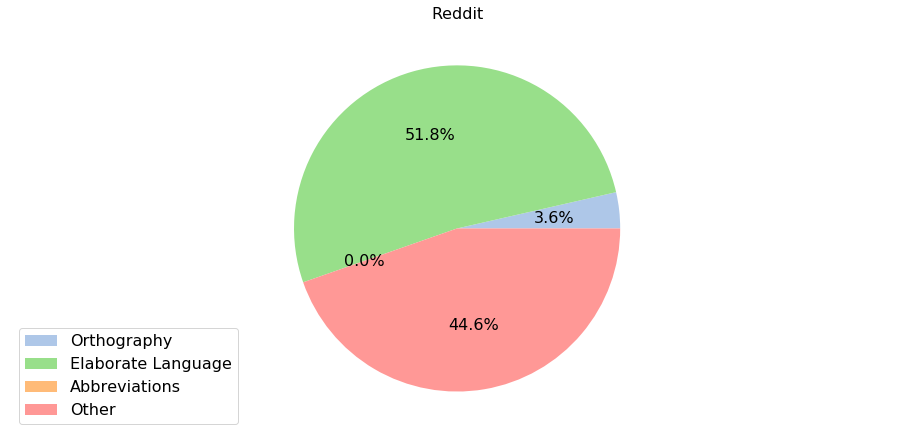

In [19]:
#Reddit
labels= ["False Positive", "False Negative"]
values = [41,56]
makepie(values, labels, "Reddit",1)

labels = ["Indication","Different Use of ADR word", "Negation", "Other"]
values = [11,24,5,1]
makepie(values, labels, "Reddit",2)

labels = ["Orthography", "Elaborate Language", "Abbreviations","Other"]
values = [2,29,0,25]
makepie(values, labels, "Reddit",3)

In [224]:
errors = pd.read_csv("data/error_analysis.csv", sep="|", encoding="utf8")

In [58]:
errors[
    (errors.errortype=="FP")]

,datasource,errortype,errorname,quantity
0,twitter,FP,Indication,2
1,twitter,FP,Different use of ADR word,17
2,twitter,FP,Negation,2
3,twitter,FP,Other,18
8,MHF,FP,Indication,18
9,MHF,FP,Different use of ADR word,22
10,MHF,FP,Negation,2
11,MHF,FP,Other,5
16,reddit,FP,Indication,11
17,reddit,FP,Different use of ADR word,24


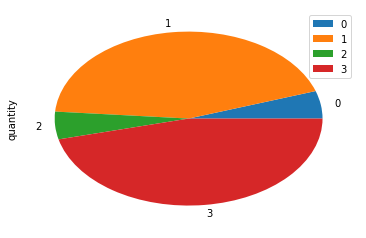

In [57]:
errors[(errors.datasource=="twitter")&(errors.errortype=="FP")].plot(kind="pie", y="quantity")

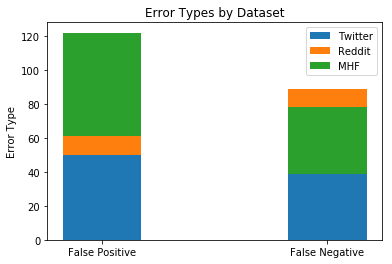

In [164]:
width = 0.35       # the width of the bars: can also be len(x) sequence

twittererrors = [50,50]
redditerrors = [61,39]
mherrors = [43,57]
ind = np.arange(2)

p1 = plt.bar(ind, twittererrors, width)
p2 = plt.bar(ind, redditerrors, width,
             bottom=twittererrors)
p3 = plt.bar(ind, mherrors, width,
             bottom=redditerrors)

plt.ylabel('Quantity')
plt.ylabel('Error Type')
plt.title('Error Types by Dataset')
plt.xticks(ind, ('False Positive', 'False Negative'))
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0], p3[0]), ('Twitter', 'Reddit','MHF'))

plt.show()

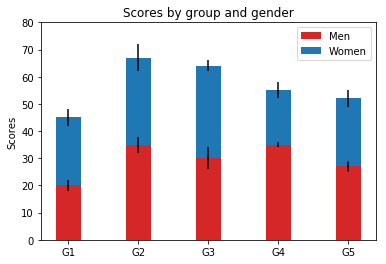

In [151]:
# a stacked bar plot with errorbars
import numpy as np
import matplotlib.pyplot as plt


N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, color='#d62728', yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()